In [66]:
#Libraries
import os
import shutil
import csv
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neurokit2 as nk
from tqdm import tqdm

#this is the general directory (change it to your own path)
gen_dir = "/Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/"

In [19]:
#intalling the necessary packages

#pip install tqdm
#pip install openpyxl

     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Functions

#this function will extract the ECG mat files
def readbindata(filepath, filename):
    fileFullPath = filepath + '/' + filename
    fidin = open(fileFullPath, 'rb')
    dataTen = bytearray(fidin.read())
    fidin.close()
    chc = filename.split('.')
    chc = chc[0].split('-')
    start_time1 = chc[0]
    stop_time1 = chc[1]
    folder_num = chc[2] if len(chc) == 3 else ''
    L = len(dataTen)
    data = []
    for n in range(int((L-528-208)/2)):
        data.append(dataTen[529+2*n] + 256*dataTen[529+2*n+1])
    L = len(data)
    start_time = datetime.datetime.strptime(start_time1, '%Y%m%d%H%M%S')
    stop_time = datetime.datetime.strptime(stop_time1, '%Y%m%d%H%M%S%f')
    start_time_str = start_time.strftime('%Y-%m-%d %H:%M:%S')
    stop_time_str = stop_time.strftime('%Y-%m-%d %H:%M:%S')
    L1 = len(str(start_time))
    start = (start_time.hour*60 + start_time.minute)*60 + start_time.second
    stop = (stop_time.hour*60 + stop_time.minute)*60 + stop_time.second
    time = stop - start
    fs = round(L/time/128)
    if fs == 4:
        fs = 512
    elif fs == 2:
        fs = 256
    elif fs == 1:
        fs = 128
    output_filename = '{}_ecg_{}.csv'.format(folder_num, fs)
    return start_time_str, stop_time_str, fs, output_filename, data

In [6]:
#this code will extract the ECG mat files from ECG_experiment and saved it in csv file

#defining the path to the input and output folders
data_folder = os.path.join(gen_dir, "Data_ALL/ECSMP_dataset/ECG_experiment/")
output_folder = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files")

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for subdir, dirs, files in os.walk(data_folder):
    for file in files:
        if file.endswith(".bin"):
            src_file = os.path.join(subdir, file)
            subfolder = os.path.basename(subdir)
            start_time_str, stop_time_str, fs, output_filename, data = readbindata(subdir, file)
            output_file_path = os.path.join(output_folder, subfolder.zfill(3) + "_" + "ecg" + ".csv")
            with open(output_file_path, 'w', newline='') as csv_file:
                writer = csv.writer(csv_file)
                writer.writerows(zip(data))
            print('File', file, 'saved as', output_file_path)

File 20180413142822-20180413161641100.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\001_ecg.csv
File 20180416153922-20180416171231100.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\002_ecg.csv
File 20180416203645-2018041621590199.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\003_ecg.csv
File 20180417142123-20180417160136100.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\005_ecg.csv
File 20180417192527-2018041720515699.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\006_ecg.csv
File 20180418095533-2018041811344599.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\0

File 20180515191507-20180515205242.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\054_ecg.csv
File 20180516090918-2018051610324199.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\055_ecg.csv
File 20180520093928-20180520105741100.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\057_ecg.csv
File 20180525143103-20180525162540100.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\059_ecg.csv
File 20180525161333-20180525174845100.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\060_ecg.csv
File 20180527140619-20180527153536100.bin saved as /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files\06

In [7]:
#couting the number of files processed
directory_ecg = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files")

count = len(os.listdir(directory_ecg))
print(f"There are {count} files in the {directory_ecg} directory.")

There are 83 files in the /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files directory.


In [14]:
#077_segmnet5 was removed bec it has 0 bites

#important code: DO NOT DELETE
#this code adding labels in the files

import os
import shutil

#defining the path to the input and output folders
data_path = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files")
output_path = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled")

#defining path for SDS_clean.xlsx
label_file_path = os.path.join(gen_dir, "Data_ALL/SDS_clean.xlsx")

#creating the new folder automatically
if not os.path.exists(output_path):
    os.makedirs(output_path)

#reading label files
df_labels = pd.read_excel(label_file_path)

#looping through CSV files and label them
for filename in os.listdir(data_path):
    if filename.endswith('.csv'):
        #getting ID from file name
        file_id = filename.split('_')[0]
        #file_id = file_id.zfill(3)
        
        #finding and matching label in the DataFrame
        label_row = df_labels.loc[df_labels['ID'] == int(file_id)]
        if len(label_row) == 1:
            label = label_row['Category'].values[0]
            #renaming the file with the label
            new_filename = f"{file_id}_ecg_{label}.csv"
            #copying the file with the label and save it to the output directory
            csv_file_path = os.path.join(data_path, filename)
            output_file_path = os.path.join(output_path, new_filename)
            shutil.copy(csv_file_path, output_file_path)
            print(f"Labeled {filename} as {new_filename} and saved to {output_path}")


Labeled 001_ecg.csv as 001_ecg_1.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 002_ecg.csv as 002_ecg_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 003_ecg.csv as 003_ecg_1.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 005_ecg.csv as 005_ecg_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 006_ecg.csv as 006_ecg_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 007_ecg.csv as 007_ecg_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 008_ecg.

Labeled 060_ecg.csv as 060_ecg_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 062_ecg.csv as 062_ecg_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 063_ecg.csv as 063_ecg_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 064_ecg.csv as 064_ecg_1.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 065_ecg.csv as 065_ecg_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 066_ecg.csv as 066_ecg_0.csv and saved to /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled
Labeled 067_ecg.

In [15]:
#couting the number of files processed
directory_ecg = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled")

count = len(os.listdir(directory_ecg))
print(f"There are {count} files in the {directory_ecg} directory.")

There are 81 files in the /Users/w20009829/OneDrive - Northumbria University - Production Azure AD/Term3/Data_ALL/ECG/ECG_csv_files_labeled directory.


In [34]:
time.shape

(3343496,)

In [22]:
#extracting baseline6 and saving it to ECG_csv_files_labeled_baseline6

#setting up directories
src_directory = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled")
dest_directory = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled_baseline6")

#creating the new folder automatically
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

#defining constants
baseline_duration = 6 * 60  # 6 minutes
baseline_samples = 512 * baseline_duration  # 512 Hz sampling rate

#getting the list of files in source directory
files = [f for f in os.listdir(src_directory) if f.endswith(".csv")]

#looping through all files in source directory with progress bar
for filename in tqdm(files, desc="Extracting baseline 6 minutes"):
    #loading original file
    df = pd.read_csv(os.path.join(src_directory, filename))
    #extracting first 6 minutes of data
    df_baseline6 = df.iloc[:baseline_samples]
    #saving to new directory with same filename
    df_baseline6.to_csv(os.path.join(dest_directory, filename), index=False)


Extracting baseline 6 minutes: 100%|██████████| 81/81 [00:37<00:00,  2.13it/s]


In [26]:
import os
import pandas as pd
import neurokit2 as nk
from tqdm import tqdm

# Set up directories
src_directory = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled_baseline6")
dest_directory = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled_baseline6_pantompkins")

# Create destination directory if it doesn't exist
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

# Loop through all files in the source directory
for filename in tqdm(os.listdir(src_directory)):
    # Load the data
    data = pd.read_csv(os.path.join(src_directory, filename), header=None)
    
    # Apply the Pan-Tompkins algorithm for ECG cleaning
    cleaned_data = nk.ecg_clean(data[0], sampling_rate=512, method="pantompkins")
    
    # Save the cleaned data to the destination directory
    #cleaned_data.to_csv(os.path.join(dest_directory, filename), index=False, header=False)
    pd.DataFrame(cleaned_data).to_csv(os.path.join(dest_directory, filename), index=False, header=False)


100%|██████████| 81/81 [00:30<00:00,  2.70it/s]


In [63]:
import os
import pandas as pd

# Set up directories
src_directory = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled")
dest_directory = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled_segment6")

# Create destination directory if it doesn't exist
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

# Set up sampling rate and duration
sampling_rate = 512
duration = 6 * 60  # 6 minutes

# Loop through all files in the source directory
for filename in tqdm(os.listdir(src_directory)):
    # Read the data file
    data = pd.read_csv(os.path.join(src_directory, filename), header=None)
    signal = data.values.flatten()
    
    # Extract the second 6 minutes of data
    start_sample = sampling_rate * 60 * 6  # starting sample index for the 6th minute
    end_sample = start_sample + (sampling_rate * duration)  # ending sample index for the 12th minute
    second_6_mins = signal[start_sample:end_sample]
    
    # Save the extracted data to the destination directory
    pd.DataFrame(second_6_mins).to_csv(os.path.join(dest_directory, filename), index=False, header=False)


100%|██████████| 81/81 [00:38<00:00,  2.09it/s]


In [67]:
#filtering the segment6 files using pantompkins

# Set up directories
src_directory = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled_segment6")
dest_directory = os.path.join(gen_dir, "Data_ALL/ECG/ECG_csv_files_labeled_segment6_pantompkins")

# Create destination directory if it doesn't exist
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)

# Loop through all files in the source directory
for filename in tqdm(os.listdir(src_directory)):
    # Load the data
    data = pd.read_csv(os.path.join(src_directory, filename), header=None)
    
    # Apply the Pan-Tompkins algorithm for ECG cleaning
    cleaned_data = nk.ecg_clean(data[0], sampling_rate=512, method="pantompkins")
    
    # Save the cleaned data to the destination directory
    #cleaned_data.to_csv(os.path.join(dest_directory, filename), index=False, header=False)
    pd.DataFrame(cleaned_data).to_csv(os.path.join(dest_directory, filename), index=False, header=False)


100%|██████████| 81/81 [00:30<00:00,  2.65it/s]


VISUALIZATION (Baseline6)

In [1]:
#sample raw ecg signal(whole vs first 3 seconds)

# Load data
data = pd.read_csv(gen_dir + "Data_ALL/ECG/ECG_csv_files_labeled_baseline6/002_ecg_0.csv", header=None)
data = data.values.flatten()

# Create time axis
sampling_rate = 512
len_signal = np.arange(len(data))
time = np.arange(len(data)) / sampling_rate

# Plot whole data
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = len_signal,  y=data, color='orange')
plt.title("Sample Raw ECG Signal", fontsize=15)

# Plot first 10 seconds
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=time, y=data, color='orange')
ax.set_xlim(0, 3)
plt.title("First 3 Seconds of Raw ECG signal", fontsize=15)


NameError: name 'pd' is not defined

Text(0.5, 1.0, 'First 3 Seconds of Filtered ECG signal')

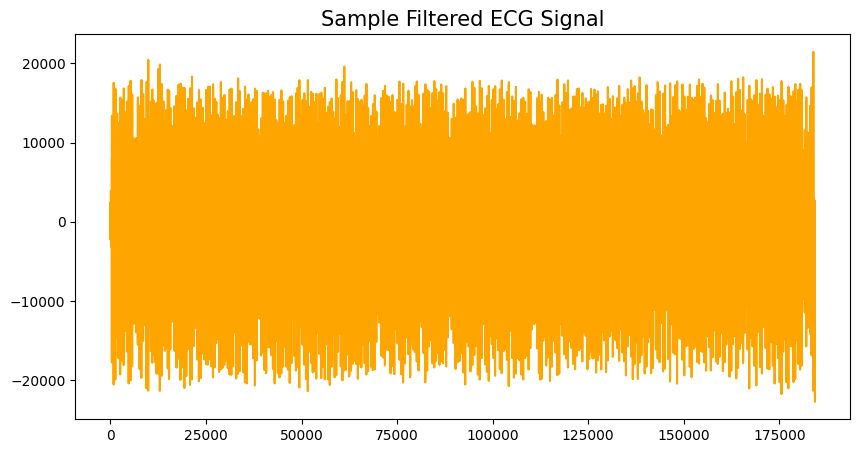

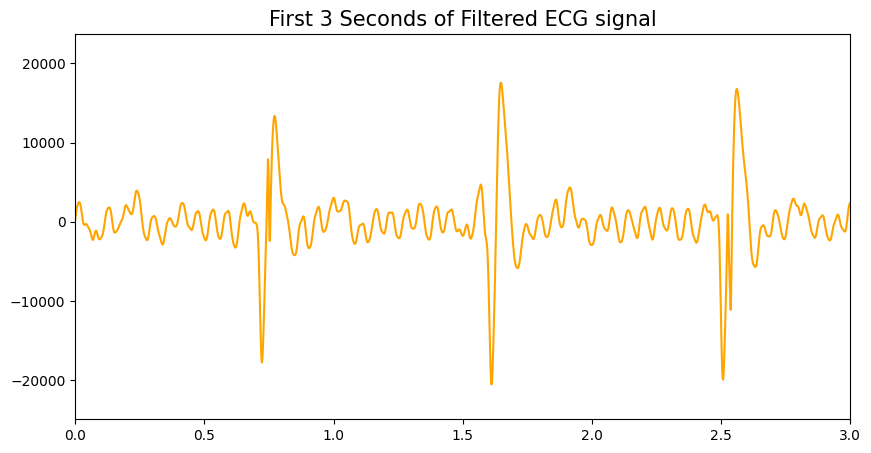

In [60]:
#sample filtered ecg signal(whole vs first 3 seconds)

# Load data
data = pd.read_csv(gen_dir + "Data_ALL/ECG/ECG_csv_files_labeled_baseline6_pantompkins/002_ecg_0.csv", header=None)
data = data.values.flatten()

# Create time axis
sampling_rate = 512
len_signal = np.arange(len(data))
time = np.arange(len(data)) / sampling_rate

# Plot whole data
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = len_signal,  y=data, color='orange')
plt.title("Sample Filtered ECG Signal", fontsize=15)

# Plot first 10 seconds
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=time, y=data, color='orange')
ax.set_xlim(0, 3)
plt.title("First 3 Seconds of Filtered ECG signal", fontsize=15)


VISUALIZATION (Segment6)

Text(0.5, 1.0, 'First 3 Seconds of Raw ECG signal')

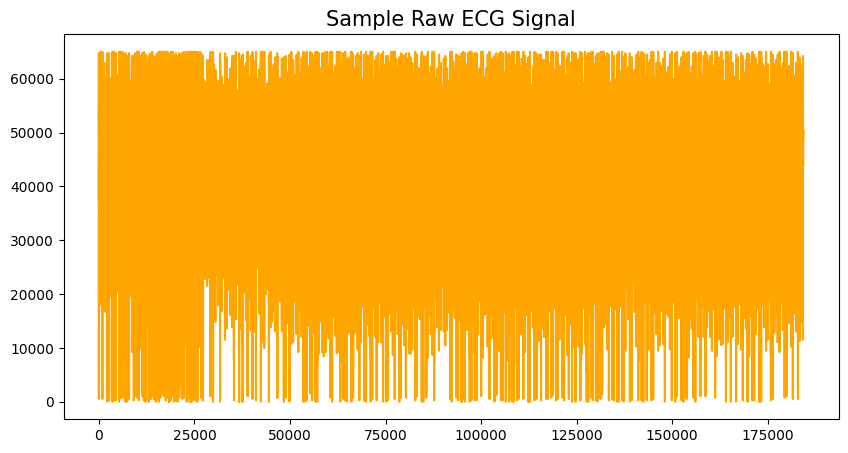

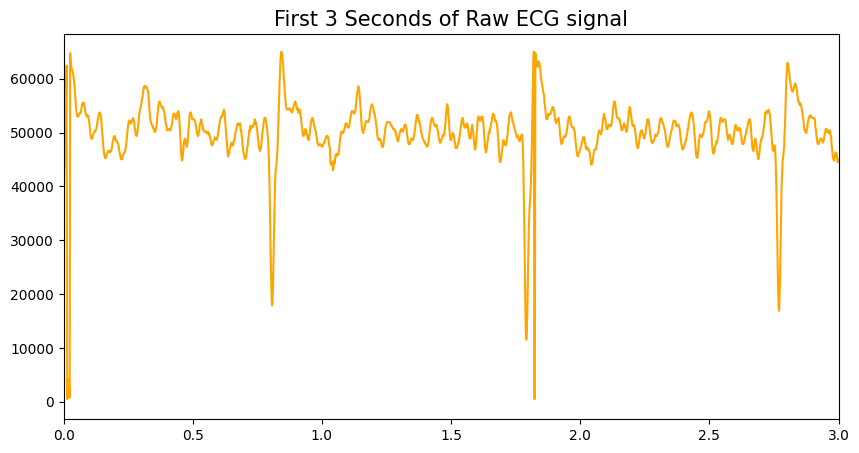

In [69]:
#sample raw ecg signal(whole vs first 3 seconds)

# Load data
data = pd.read_csv(gen_dir + "Data_ALL/ECG/ECG_csv_files_labeled_segment6/002_ecg_0.csv", header=None)
data = data.values.flatten()

# Create time axis
sampling_rate = 512
len_signal = np.arange(len(data))
time = np.arange(len(data)) / sampling_rate

# Plot whole data
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = len_signal,  y=data, color='orange')
plt.title("Sample Raw ECG Signal", fontsize=15)

# Plot first 10 seconds
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=time, y=data, color='orange')
ax.set_xlim(0, 3)
plt.title("First 3 Seconds of Raw ECG signal", fontsize=15)


Text(0.5, 1.0, 'First 3 Seconds of Filtered ECG signal')

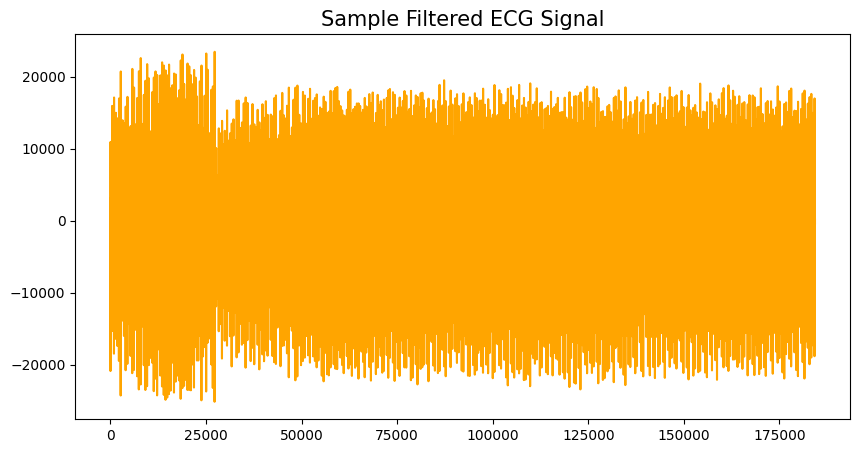

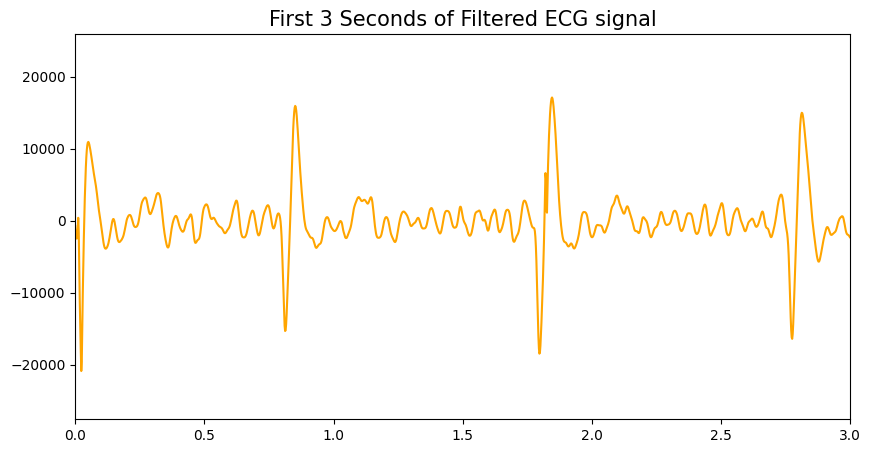

In [70]:
#sample filtered ecg signal(whole vs first 3 seconds)

# Load data
data = pd.read_csv(gen_dir + "Data_ALL/ECG/ECG_csv_files_labeled_segment6_pantompkins/002_ecg_0.csv", header=None)
data = data.values.flatten()

# Create time axis
sampling_rate = 512
len_signal = np.arange(len(data))
time = np.arange(len(data)) / sampling_rate

# Plot whole data
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = len_signal,  y=data, color='orange')
plt.title("Sample Filtered ECG Signal", fontsize=15)

# Plot first 10 seconds
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=time, y=data, color='orange')
ax.set_xlim(0, 3)
plt.title("First 3 Seconds of Filtered ECG signal", fontsize=15)
